# 長庚大學 資工系/人工智慧學程  樣形識別/深度學習 課程使用之教材及示範程式 Ch02


- [參考](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter02_mathematical-building-blocks.ipynb)

> This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.
> 
> **If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**
> 
> This notebook was generated for TensorFlow 2.6.
> 
> - The mathematical building blocks of neural networks
> 
> - A first look at a neural network
> 

**Loading the MNIST dataset in Keras**

In [3]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), \
(test_images, test_labels)= mnist.load_data()

**Data Visualization**

In [4]:
x= train_images[10000]
x

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254,
        255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

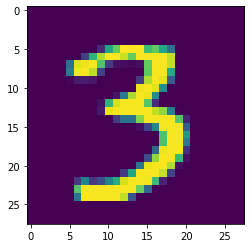

In [5]:
import matplotlib.pyplot as pl
pl.imshow(x)

In [6]:
for i in range(28):
    for j in range(28):
        z= x[i,j]
        print(f'{z:3d}', end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 29150195254255254176193150 96  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 48166224253253234196253253253253233  0  0  0  0  0  0  0  0  0
  0  0  0  0  0 93244249253187 46 10  8  4 10194253253233  0  0  0  0  0  0  0  0  0
  0  0  0  0  0107253253230 48  0  0  0  0  0192253253156  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  3 20 20 15  0  0  0  0  0 43224253245 74  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0249253245126  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 14101223253248124  0  0  0  0  

In [7]:
y= train_labels[10000]
y

3

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
len(train_labels)

60000

In [10]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
len(test_labels)

10000

In [13]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [14]:
import tensorflow     as tf
from tensorflow       import keras
from tensorflow.keras import layers

aModel= keras.Sequential([
    keras.Input((4,4)),
    keras.layers.Dense(10), #, activation="relu"),
    keras.layers.Dense(3)   #,  activation="softmax")
])

aModel.summary()
keras.utils.plot_model(aModel, show_shapes= True)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4, 10)             50        
                                                                 
 dense_1 (Dense)             (None, 4, 3)              33        
                                                                 
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________
('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


2022-09-29 20:47:28.516669: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
# ry
import tensorflow as tf
import numpy as np

x= np.ones((1,3))
#x= tf.ones((1,10))
#x= keras.Input(10)
x

y= keras.layers.Dense(3)(x)
x,y

(array([[1., 1., 1.]]),
 <tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-1.6870084 ,  0.15639448, -1.9759078 ]], dtype=float32)>)

In [16]:
aLayer= keras.layers.Dense(3)

In [17]:
#aLayer.weights
aLayer(x)


<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.8282285,  1.365974 , -1.1096249]], dtype=float32)>

In [18]:
aLayer.weights

[<tf.Variable 'dense_3/kernel:0' shape=(3, 3) dtype=float32, numpy=
 array([[-0.73222923,  0.08818865, -0.41405988],
        [-0.04525375,  0.45148253, -0.27191806],
        [-0.05074549,  0.82630277, -0.42364693]], dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

In [19]:
x= layers.Dense(512, activation="relu")


In [20]:
# https://keras.io/api/layers/
import tensorflow       as     tf
from   tensorflow       import keras
from   tensorflow.keras import layers

x=      tf.random.uniform(shape=(1,100))

iLayer= keras.Input((1, 28*28), name= 'ryInput')
aLayer= layers.Dense(30, activation= 'relu', name='a')
bLayer= layers.Dense(20, activation= 'relu', name='b')
cLayer= layers.Dense(10, activation= None, name='c')

#y1=      cLayer(bLayer(aLayer(x)))

In [21]:
aLayerL= [
    iLayer,
    aLayer,
    bLayer,
    cLayer
]

model= keras.Sequential(aLayerL)
    

In [22]:
x= train_images[0]
x= x.reshape(1,1,-1)


In [23]:
y2= model(x)
model.summary()
keras.utils.plot_model(model,show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 a (Dense)                   (None, 1, 30)             23550     
                                                                 
 b (Dense)                   (None, 1, 20)             620       
                                                                 
 c (Dense)                   (None, 1, 10)             210       
                                                                 
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________
('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [24]:
y1=      cLayer(bLayer(aLayer(x)))

**The compilation step**

In [25]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [26]:
train_images= train_images.reshape((-1, 28 * 28))
train_images= train_images.astype("float32") / 255
test_images=  test_images.reshape((-1, 28 * 28))
test_images=  test_images.astype("float32") / 255

**"Fitting" the model**

In [27]:
ryLayerL= [
    layers.Dense(128, activation= 'relu',    name='ryL1'),
    #layers.Dense(32, activation= 'relu',    name='ryL2'),
    layers.Dense(10, activation=  'softmax', name='ryLn')
]

ryModel= keras.Sequential(ryLayerL)

#x= train_images[0:1]
#y= ryModel(x)
#ryModel.summary()

In [28]:
ryModel.compile(
    optimizer="rmsprop",
    loss=     "sparse_categorical_crossentropy",
    metrics= ["accuracy"]
)

In [29]:
ryModel.fit(
    train_images[:10000], 
    train_labels[:10000], 
    epochs= 10, 
    batch_size= 128,
    verbose= 2
)

Epoch 1/10
79/79 - 0s - loss: 0.6521 - accuracy: 0.8381 - 414ms/epoch - 5ms/step
Epoch 2/10
79/79 - 0s - loss: 0.3008 - accuracy: 0.9175 - 118ms/epoch - 1ms/step
Epoch 3/10
79/79 - 0s - loss: 0.2388 - accuracy: 0.9337 - 117ms/epoch - 1ms/step
Epoch 4/10
79/79 - 0s - loss: 0.1994 - accuracy: 0.9436 - 116ms/epoch - 1ms/step
Epoch 5/10
79/79 - 0s - loss: 0.1685 - accuracy: 0.9525 - 133ms/epoch - 2ms/step
Epoch 6/10
79/79 - 0s - loss: 0.1454 - accuracy: 0.9587 - 133ms/epoch - 2ms/step
Epoch 7/10
79/79 - 0s - loss: 0.1269 - accuracy: 0.9666 - 125ms/epoch - 2ms/step
Epoch 8/10
79/79 - 0s - loss: 0.1114 - accuracy: 0.9690 - 118ms/epoch - 1ms/step
Epoch 9/10
79/79 - 0s - loss: 0.0954 - accuracy: 0.9750 - 143ms/epoch - 2ms/step
Epoch 10/10
79/79 - 0s - loss: 0.0844 - accuracy: 0.9776 - 138ms/epoch - 2ms/step


**Using the model to make predictions**

In [30]:
test_digits= test_images[0:10]
predictions= ryModel.predict(test_digits)
predictions[0]

array([5.7320000e-07, 2.3820707e-08, 5.7614525e-05, 1.4742750e-03,
       2.6871938e-08, 3.2287935e-06, 1.6396631e-11, 9.9838102e-01,
       1.3657549e-06, 8.1900653e-05], dtype=float32)

In [31]:
predictions[0].argmax()

7

In [32]:
predictions[0][7]

0.998381

In [33]:
test_labels[0]

7

**Evaluating the model on new data**

In [34]:
test_loss, test_acc = ryModel.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 0s 683us/step - loss: 0.1859 - accuracy: 0.9422
test_acc: 0.9422000050544739


## Data representations for neural networks
- 2.2 神經網絡的數據表示


In [35]:
x= 1

x= [1]

x= [1,2]

x= [[1,2], 
    [3,4]]

x= [[[1,2], 
     [3,4]],
    [[5,6], 
     [7,8]]]

x= [[[[1,2], 
      [3,4]],
     [[5,6], 
      [7,8]]],
    [[[9,10], 
      [11,12]],
     [[13,14], 
      [15,16]]]]


In [36]:
x= 1
a= [x]
b= [a,a]
c= [b,b]
d= [c,c]

In [37]:
x, x*2

(1, 2)

In [38]:
a, a*2

([1], [1, 1])

In [39]:
d*2

[[[[1], [1]], [[1], [1]]],
 [[[1], [1]], [[1], [1]]],
 [[[1], [1]], [[1], [1]]],
 [[[1], [1]], [[1], [1]]]]

In [40]:
import numpy as np
np.array(d)*2

array([[[[2],
         [2]],

        [[2],
         [2]]],


       [[[2],
         [2]],

        [[2],
         [2]]]])

In [41]:
xL= [i 
    for i in range(2*3*4)]
xA= np.array(xL)
xA= xA.reshape(2,3,4)
xL, xA

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 array([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],
 
        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]]))

In [42]:
xLL= xA.tolist()
xLL

[[[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11]],
 [[12, 13, 14, 15], [16, 17, 18, 19], [20, 21, 22, 23]]]

In [43]:
q= [[[ 0,  1,  2,  3], 
     [ 4,  5,  6,  7], 
     [ 8,  9, 10, 11]],
    [[12, 13, 14, 15], 
     [16, 17, 18, 19], 
     [20, 21, 22, 23]]]

In [44]:
q= xA[:,0,0] # axis= 0
q.ndim, q.size, len(q)

(1, 2, 2)

In [45]:
q= xA[0,:,0] # axis= 1
q.ndim, q.size, len(q)

(1, 3, 3)

In [46]:
q= xA[0,0,:] # axis= 2
q.ndim, q.size, len(q)

(1, 4, 4)

In [47]:
q= xA[:,:,0] # axes= 01
q.ndim, q.size, len(q)

(2, 6, 2)

In [48]:
q= xA[:,0,:] # axes= 02
q.ndim, q.size, len(q)

(2, 8, 2)

In [49]:
q= xA[0,:,:] # axes= 12
q.ndim, q.size, len(q)

(2, 12, 3)

In [50]:
q= xA[:,:,:] # axes= 012
q.ndim, q.size, len(q), q.shape

(3, 24, 2, (2, 3, 4))

In [51]:
q.shape,\
q.ndim == len(q.shape), \
len(q) == q.shape[0], \
q.size == np.prod(q.shape)

((2, 3, 4), True, True, True)

In [52]:
q.dtype

dtype('int64')

In [53]:
q.itemsize

8

In [54]:
q.tobytes()

b'\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00\x00\x00\x00\x00\x03\x00\x00\x00\x00\x00\x00\x00\x04\x00\x00\x00\x00\x00\x00\x00\x05\x00\x00\x00\x00\x00\x00\x00\x06\x00\x00\x00\x00\x00\x00\x00\x07\x00\x00\x00\x00\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00\t\x00\x00\x00\x00\x00\x00\x00\n\x00\x00\x00\x00\x00\x00\x00\x0b\x00\x00\x00\x00\x00\x00\x00\x0c\x00\x00\x00\x00\x00\x00\x00\r\x00\x00\x00\x00\x00\x00\x00\x0e\x00\x00\x00\x00\x00\x00\x00\x0f\x00\x00\x00\x00\x00\x00\x00\x10\x00\x00\x00\x00\x00\x00\x00\x11\x00\x00\x00\x00\x00\x00\x00\x12\x00\x00\x00\x00\x00\x00\x00\x13\x00\x00\x00\x00\x00\x00\x00\x14\x00\x00\x00\x00\x00\x00\x00\x15\x00\x00\x00\x00\x00\x00\x00\x16\x00\x00\x00\x00\x00\x00\x00\x17\x00\x00\x00\x00\x00\x00\x00'

In [55]:
q.size*q.itemsize

192

In [56]:
'''
b'
\x00\x00\x00\x00
\x01\x00\x00\x00
\x02\x00\x00\x00
\x03\x00\x00\x00
\x04\x00\x00\x00
\x05\x00\x00\x00
\x06\x00\x00\x00
\x07\x00\x00\x00
\x08\x00\x00\x00
  \t\x00\x00\x00
  \n\x00\x00\x00
\x0b\x00\x00\x00
\x0c\x00\x00\x00
  \r\x00\x00\x00
\x0e\x00\x00\x00
\x0f\x00\x00\x00
\x10\x00\x00\x00
\x11\x00\x00\x00
\x12\x00\x00\x00
\x13\x00\x00\x00
\x14\x00\x00\x00
\x15\x00\x00\x00
\x16\x00\x00\x00
\x17\x00\x00\x00'
'''

"\nb'\n\x00\x00\x00\x00\n\x01\x00\x00\x00\n\x02\x00\x00\x00\n\x03\x00\x00\x00\n\x04\x00\x00\x00\n\x05\x00\x00\x00\n\x06\x00\x00\x00\n\x07\x00\x00\x00\n\x08\x00\x00\x00\n  \t\x00\x00\x00\n  \n\x00\x00\x00\n\x0b\x00\x00\x00\n\x0c\x00\x00\x00\n  \r\x00\x00\x00\n\x0e\x00\x00\x00\n\x0f\x00\x00\x00\n\x10\x00\x00\x00\n\x11\x00\x00\x00\n\x12\x00\x00\x00\n\x13\x00\x00\x00\n\x14\x00\x00\x00\n\x15\x00\x00\x00\n\x16\x00\x00\x00\n\x17\x00\x00\x00'\n"

### Scalars (rank-0 tensors)

In [57]:
import numpy as np
x = np.array(12)
x

array(12)

In [58]:
x.ndim

0

### Vectors (rank-1 tensors)

In [59]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [60]:
x.ndim

1

### Matrices (rank-2 tensors)

In [61]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [62]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

In [63]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [64]:
train_images.ndim

3

In [65]:
train_images.shape

(60000, 28, 28)

In [66]:
train_images.dtype

dtype('uint8')

In [67]:
train_images.size

47040000

In [68]:
train_images.nbytes

47040000

In [69]:
np.prod(train_images.shape)

47040000

**Displaying the fourth digit**

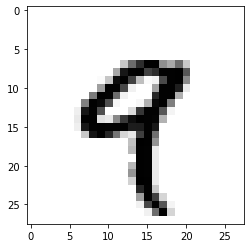

In [70]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [71]:
train_labels[4]

9

### Manipulating tensors in NumPy

In [72]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [73]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [74]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [75]:
my_slice = train_images[:, 14:, 14:]

In [76]:
my_slice = train_images[:, 7:-7, 7:-7]

### The notion of data batches

In [77]:
batch = train_images[:128]

In [78]:
batch = train_images[128:256]

In [79]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [80]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [81]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [82]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.00 s


In [83]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 1.85 s


### Broadcasting

In [84]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [85]:
y = np.expand_dims(y, axis=0)

In [86]:
Y = np.concatenate([y] * 32, axis=0)

In [87]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [88]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product

In [89]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [90]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [91]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [92]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [93]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [94]:
train_images = train_images.reshape((60000, 28 * 28))

In [95]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [96]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [97]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [98]:
import tensorflow as tf
x= tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [99]:
x= tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [100]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))

with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
    
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])


In [101]:
W, b, x

(<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
 array([[0.08017635, 0.73638916],
        [0.1721716 , 0.22789407]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0.8177005 , 0.76934063],
        [0.22604299, 0.33541667]], dtype=float32)>)

In [102]:
W, b, x

def f(x,W,b):
    y= x @ W + b
    return y

with tf.GradientTape() as t:
    #t= tf.GradientTape()
    z= f(x,W,b)
    #z= f(z,W,b)
    
dz_Wb= t.gradient(z, [W, b])
dz_Wb

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1.0437435, 1.0437435],
        [1.1047573, 1.1047573]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

## Looking back at our first example

In [103]:
import tensorflow                as     tf
from   tensorflow                import keras
from   tensorflow.keras          import layers
from   tensorflow.keras.datasets import mnist

data=     mnist.load_data()
tr, ts=   data
trX, trY= tr
tsX, tsY= ts

trX.shape, trY.shape, tsX.shape, tsY.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [104]:
trX= trX.reshape(-1,28*28)
tsX= tsX.reshape(-1,28*28)

trX= trX/np.max(trX)
tsX= tsX/tsX.max()

trX.shape, trY.shape, tsX.shape, tsY.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [105]:
model= keras.Sequential(
    [keras.Input(shape=(28*28)),
     layers.Dense(512, activation="relu"),
     layers.Dense(10,  activation="softmax")]
)

model.summary()
keras.utils.plot_model(model, show_shapes= True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [106]:
model.compile(
    loss=     "sparse_categorical_crossentropy",
    metrics=  ["accuracy"]
)


model.fit(
    x= trX, 
    y= trY,
    epochs= 10
)

model.evaluate(
    x= trX, 
    y= trY, 
)

model.evaluate(
    x= tsX, 
    y= tsY, 
)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2022 - accuracy: 0.9412
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0906 - accuracy: 0.9736
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0646 - accuracy: 0.9816
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0507 - accuracy: 0.9858
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0415 - accuracy: 0.9889
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0338 - accuracy: 0.9916
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0266 - accuracy: 0.9928
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0231 - accuracy: 0.9939
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0187 - accuracy: 0.9948
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.1051 

[0.10513752698898315, 0.9811999797821045]

In [107]:
aLayer= keras.layers.CategoryEncoding(
    num_tokens= 10, 
    output_mode= "one_hot")
aLayer([1,2,3])

<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [108]:
aLayer(trY.astype('float32'))

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)>

In [109]:
train_images= train_images.reshape(-1, 28 * 28)
train_images= train_images.astype("float32") / 255
test_images=  test_images.reshape(-1, 28 * 28)
test_images=  test_images.astype("float32") / 255

In [110]:
model= keras.Sequential(
    [layers.Dense(512, activation="relu"),
     layers.Dense(10,  activation="softmax")]
)

In [111]:
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [112]:
model.fit(
    train_images, 
    train_labels, 
    epochs=5, 
    batch_size=128
)

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.2562 - accuracy: 0.9258
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1049 - accuracy: 0.9690
Epoch 3/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0685 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0504 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0378 - accuracy: 0.9887


### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [113]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, 
                 input_size, 
                 output_size, 
                 activation):
        
        self.activation= activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        
        self.W= tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        
        self.b= tf.Variable(b_initial_value)

    def __call__(self, inputs):
        #return self.activation(tf.matmul(inputs, self.W) + self.b)
        
        y= inputs @ self.W + self.b
        y= self.activation(y)
        return y
    

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [114]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers= layers

    def __call__(self, inputs):
        x= inputs
        for layer in self.layers:
           x= layer(x)
        return x

    @property
    def weights(self):
       weights= []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [115]:
model= NaiveSequential(
    [ NaiveDense(
        input_size=28 * 28, 
        output_size=512, 
        activation= tf.nn.relu),
      NaiveDense(
        input_size=512, 
        output_size=10, 
        activation= tf.nn.softmax)]
)
#assert len(model.weights) == 4
len(model.weights)

4

#### A batch generator

In [116]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images= self.images[
            self.index : self.index + self.batch_size]
        labels= self.labels[
            self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [117]:
def one_training_step(model, images_batch, labels_batch):
    
    with tf.GradientTape() as tape:
        predictions= model(images_batch)
        per_sample_losses= tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss= tf.reduce_mean(per_sample_losses)
    
    gradients= tape.gradient(
        average_loss, 
        model.weights)
    
    update_weights(
        gradients, 
        model.weights)
    
    return average_loss

In [118]:
learning_rate= 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [119]:
from tensorflow.keras import optimizers

optimizer= optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [120]:
def fit(model, images, labels, epochs, batch_size=128):
    
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        
        batch_generator= BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [121]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images= train_images.reshape(-1, 28 * 28)
train_images= train_images.astype("float32") / train_images.max()
test_images=  test_images.reshape(-1, 28 * 28)
test_images=  test_images.astype("float32") / test_images.max()

fit(model, 
    train_images, 
    train_labels, 
    epochs=10, 
    batch_size=128)

Epoch 0
loss at batch 0: 5.35
loss at batch 100: 2.23
loss at batch 200: 2.19
loss at batch 300: 2.06
loss at batch 400: 2.21
Epoch 1
loss at batch 0: 1.87
loss at batch 100: 1.87
loss at batch 200: 1.82
loss at batch 300: 1.68
loss at batch 400: 1.82
Epoch 2
loss at batch 0: 1.55
loss at batch 100: 1.58
loss at batch 200: 1.50
loss at batch 300: 1.40
loss at batch 400: 1.50
Epoch 3
loss at batch 0: 1.29
loss at batch 100: 1.34
loss at batch 200: 1.23
loss at batch 300: 1.19
loss at batch 400: 1.26
Epoch 4
loss at batch 0: 1.09
loss at batch 100: 1.16
loss at batch 200: 1.04
loss at batch 300: 1.03
loss at batch 400: 1.10
Epoch 5
loss at batch 0: 0.95
loss at batch 100: 1.02
loss at batch 200: 0.90
loss at batch 300: 0.92
loss at batch 400: 0.98
Epoch 6
loss at batch 0: 0.85
loss at batch 100: 0.91
loss at batch 200: 0.79
loss at batch 300: 0.83
loss at batch 400: 0.89
Epoch 7
loss at batch 0: 0.77
loss at batch 100: 0.83
loss at batch 200: 0.71
loss at batch 300: 0.76
loss at batch 40

### Evaluating the model

In [122]:
predictions= model(test_images)
predictions= predictions.numpy()
predicted_labels= np.argmax(predictions, axis=1)
matches = (predicted_labels == test_labels)

print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.82


## Summary